In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

## ExcelからDataを読み込む

/Users/tobiuo/learning/machine-learning/venv/lib/python3.8/site-packages/openpyxl/worksheet/_reader.py:312: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


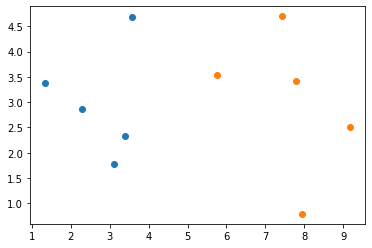

In [2]:
# Excel内の画像などは読み込めないというwarningが出るが, dataは読み込めているため無視する. 
data = pd.read_excel("12-KNearestNeighbors.xlsx", usecols=[0, 1, 2], header=3)[:10].astype(np.float64)
plt.scatter(data.X1[:5], data.X2[:5])
plt.scatter(data.X1[5:], data.X2[5:])

## テスト用のDataを読み込む

In [3]:
test = pd.read_excel("12-KNearestNeighbors.xlsx", usecols=[0, 1, 2], header=25)[:1].astype(np.float64)
test

,X1,X2,Y
0,8.093607,3.365732,1.0


## 各点との距離を計算し, 最も近い点からclassを予測する関数を定義する

In [4]:
k = 3
predict = []
for t in test.itertuples():
    distances = np.sqrt((t.X1 - data.X1)**2 + (t.X2 - data.X2)**2)
    nearer = np.where(distances.rank() < k+1)
    votes = data.Y.loc[nearer]
    predict.append(int(votes.mode()))

predict

[1]

## 予測が正しいか確かめる

In [5]:
print(predict == test.Y)

0    True
Name: Y, dtype: bool
